In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_excel('online_retail_dataset.xlsx', sheet_name='Online Retail')

In [2]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# Retirando valores nulos
df.dropna(subset=['CustomerID'], inplace=True)

# Extraindo os valores maiores que 0
df = df.loc[df['Quantity'] > 0]

# Removendo os valores negativos
df = df.loc[df['UnitPrice'] > 0]

# Pegando as datas mensais/ retirando os 'dias' faltantes para completar o mês.
df = df.loc[df['InvoiceDate'] < '2011-12-01']

# Calculando o valor total
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Agrupando o cliente e nota, vendido de cada cliente por nota e pega a data mais recente.
# 
df_orders = df.groupby(['CustomerID',
                        'InvoiceNo']).agg({'Sales': sum,
                                           'InvoiceDate': max})

In [5]:
df_orders

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17754 rows x 2 columns]

In [6]:
# Estimando a frequencia, recorrencia e total de compras do cliente
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days # Dias que o cliente esta sem comprar 

def avg_frequency(x):
    return (x.max() - x.min()).days / x.count() # media de quanto tempo o cliente leva para efetuar
                                                # uma nova compra

In [7]:
groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [8]:
df_summary = df_orders.reset_index().groupby('CustomerID').agg({
            'Sales': [min, max, sum, groupby_mean, groupby_count],
            'InvoiceDate': [min, max, purchase_duration, avg_frequency]
             })

In [9]:
df_summary
# Aqui podemos fazer diversas analises.
# 1- Quantidade de compras por cliente
# 2- Tempo que o cliente leva para comprar novamente
# 3- Valor medio que o cliente costuma comprar 

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   
...              ...       ...       ...           ...   ...   
18280.0       180.60    180.60    180.60    180.600000     1   
18281.0        80.82     80.82     80.82     80.820000     1   
18282.0       100.21    100.21    100.21    100.210000     1   
18283.0         1.95    313.65   1886.88    125.792000    15   
18287.0        70.68   1001.32   1837.28    612.426667     3   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                        ...                 ...               ...   
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282.0    2011-08-05 13:35:00 2011-08-05 13:35:00                 0   
18283.0    2011-01-06 14:14:00 2011-11-30 12:59:00               327   
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                               
           purchase_frequency  
CustomerID                     
12346.0              0.000000  
12347.0             54.500000  
12348.0             70.500000  
12349.0              0.000000  
12350.0              0.000000  
...                       ...  
18280.0              0.000000  
18281.0              0.000000  
18282.0              0.000000  
18283.0             21.800000  
18287.0             52.666667  

[4297 rows x 9 columns]

In [10]:
# Incluindo o nome 'Sale' e 'InvoiceDate' na coluna primaria
df_summary.columns = ['_'.join(col).lower() for col in df_summary.columns]
# Pegando os valores que são maiores/acima que 0 dentro da variavel 'invoicedate_purchase_duration'
df_summary = df_summary.loc[df_summary['invoicedate_purchase_duration'] > 0]

In [11]:
df_summary.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12352.0,120.33,840.30,2506.04,313.255000,8,2011-02-16 12:33:00,2011-11-03 14:37:00,260,32.500000
12356.0,58.35,2271.62,2811.43,937.143333,3,2011-01-18 09:50:00,2011-11-17 08:40:00,302,100.666667
12359.0,547.50,2876.85,6372.58,1593.145000,4,2011-01-12 12:43:00,2011-10-13 12:47:00,274,68.500000


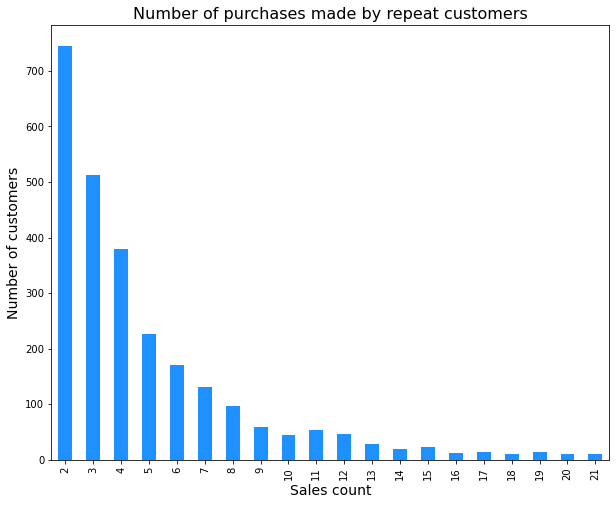

In [12]:
# Let's look at the number of purchases
ax = df_summary.groupby('sales_count').count()['sales_avg'][:20].plot(
        kind='bar', 
        color='dodgerblue', 
        figsize=(10,8), 
        grid=False)
plt.xlabel('Sales count', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Number of purchases made by repeat customers', fontsize=16);

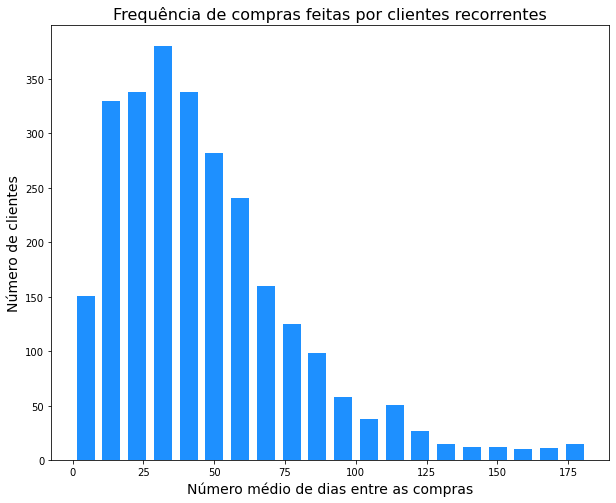

In [30]:
ax = df_summary['invoicedate_purchase_frequency'].hist(
        bins=20,
        color='dodgerblue',
        rwidth=0.7,
        figsize=(10,8),
        grid=False)
plt.xlabel('Número médio de dias entre as compras', fontsize=14)
plt.ylabel('Número de clientes', fontsize=14)
plt.title('Frequência de compras feitas por clientes recorrentes', fontsize=16);

# Preparação (Regressão Linear)

In [14]:
# preparando para fazer a predição para os proximos 3 meses 
# e pegando uma 'amostra' para fazer um teste.
clv_freq = '3M'
df_data = df_orders.reset_index().groupby([
            'CustomerID',
            pd.Grouper(key='InvoiceDate', freq=clv_freq)
            ]).agg({'Sales': [sum, groupby_mean, groupby_count],})
df_data.columns = ['_'.join(col).lower() for col in df_data.columns]
df_data = df_data.reset_index()
map_date_month = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
                    sorted(df_data.reset_index()['InvoiceDate'].unique(), reverse=True))}
df_data['M'] = df_data['InvoiceDate'].apply(lambda x: map_date_month[str(x)[:10]])
df_features = pd.pivot_table(
                df_data.loc[df_data['M'] != 'M_1'], 
                values=['sales_sum', 'sales_avg', 'sales_count'], 
                columns='M', 
                index='CustomerID')
df_features.reset_index()
df_features.columns = ['_'.join(col) for col in df_features.columns]
df_features.reset_index(level=0, inplace=True)

# Vamos preencher os valores Null com 0
df_features.fillna(0, inplace=True)

# Selecionando o objetivo
df_target = df_data.loc[df_data['M'] == 'M_1', ['CustomerID', 'sales_sum']]
df_target.columns = ['CustomerID', 'CLV_'+clv_freq]

df_sample_set = df_features.merge(
                df_target, 
                left_on='CustomerID', 
                right_on='CustomerID',
                how='left')
df_sample_set.fillna(0, inplace=True)

In [15]:
df_features.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
0,12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
3,12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
4,12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00


In [16]:
df_target

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
...,...,...
9206,18274.0,175.92
9207,18276.0,335.86
9208,18277.0,110.38
9216,18283.0,766.21


In [17]:
df_sample_set
# com a mostra, temos o resultado de tempo que o cliente poderá comprar novamente e a quantidade

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.000000,0.000,77183.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,0.00
1,12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,0.00
3,12350.0,0.000000,0.000,334.400000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,0.00
4,12352.0,316.250000,0.000,312.362000,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,18280.0,0.000000,0.000,180.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,180.60,0.00,0.00
3612,18281.0,0.000000,80.820,0.000000,0.00,0.0,1.0,0.0,0.0,0.00,80.82,0.00,0.00,0.00
3613,18282.0,100.210000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,100.21,0.00,0.00,0.00,0.00
3614,18283.0,92.696667,131.170,105.966667,0.00,3.0,4.0,3.0,0.0,278.09,524.68,317.90,0.00,766.21


# Construindo Regressão Linear

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target_var = 'CLV_3M'
all_features = [x for x in df_sample_set.columns if x not in ['CustomerID', target_var]]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
                                    df_sample_set[all_features], 
                                    df_sample_set[target_var], 
                                    random_state=2,
                                    test_size=0.35)
lin_reg = LinearRegression(n_jobs=1)
lin_reg.fit(X_train, y_train)
coef = pd.DataFrame(list(zip(all_features, lin_reg.coef_)))
coef.columns = ['feature', 'coef']

# Avaliando a Regressão Linear

Com o conjunto de dados preparado, vamos construir um modelo de regressão linear.

In [19]:
from sklearn.metrics import r2_score, median_absolute_error

# Vamos avaliar o modelo
train_preds =  lin_reg.predict(X_train)
test_preds = lin_reg.predict(X_test)

R-squared

In [21]:
print('R-Squared for Train set: %0.2f' % r2_score(y_true=y_train, y_pred=train_preds))
print('R-Squared for Test set: %0.2f' % r2_score(y_true=y_test, y_pred=test_preds))

R-Squared for Train set: 0.71
R-Squared for Test set: 0.71


R quadrado(R-squared) - Metrica para verificar se o modelo de machine learning está funcionando bem.  
Residuos de uma regressão linear, quanto mais proximo de 1 melhor.

MedAE

In [23]:
print('MedAE for Train set: %0.2f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('MedAE for Test set: %0.2f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

MedAE for Train set: 202.41
MedAE for Test set: 205.20


MedAE(erro absoluto medio) - Metrica para verificar se o modelo de machine learning está funcionando bem
Tem uma pequena diferença entre os conjuntos de teste e de treino, que também não apresentam nenhuma discrepancia

<Figure size 640x480 with 0 Axes>

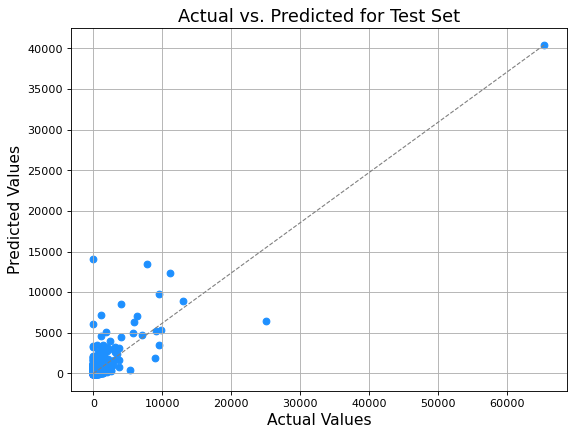

In [24]:
# scatter plot
plt.figure(figsize=(8, 6), dpi=80)
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_preds, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray',
          lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Test Set', fontsize=16)
plt.grid()